**Python for data analysis - Project**

---
TU Klarissa - THIOL Antoine

IBO5 - Data Science 4


*Lien Notebook :* https://colab.research.google.com/drive/1mNxBor3Yz4THVxKIWUKhpd_C40lF8YD2?usp=sharing



# 1. Read CSV file


The dataset used is the Online Shoppers Purchasing Intention Dataset.

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute will be used as the class label.
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sn


First, we need to read the csv. Since it's on our Google Drive, we must import it using the drive library. Then, we store the dataset into a pandas DataFrame.

In [ ]:
from google.colab import drive

# Import using Google Colab
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/online_shoppers_intention.csv")


Mounted at /content/drive


In [2]:
# Import in local
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# 2. Data exploration


Let's check if the dataset contains Null / NaN values.

In [4]:
print(f"Null: {df.isnull().sum().sum()}")
print(f"Na: {df.isna().sum().sum()}")

Null: 0
Na: 0


We can display DataFrame information such as the type of columns...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Here we can see what we have inside each column: we print the unique values.

In [6]:
for name in df.columns:
  print(f"{name}: {df[name].unique()} \n")

Administrative: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Administrative_Duration: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] 

Informational: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

Informational_Duration: [  0.   120.    16.   ... 547.75 368.25 211.25] 

ProductRelated: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136

# 3. Visualization


Now we can plot some visualization to better understand our dataset and the distribution of classes.

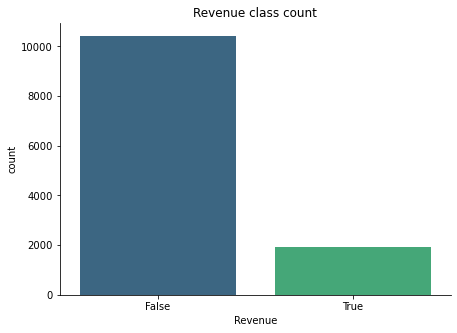

In [8]:
plt.figure(figsize=(7, 5))
sn.countplot(data=df, x="Revenue", palette="viridis")
sn.despine()
plt.title("Revenue class count")
plt.show() 

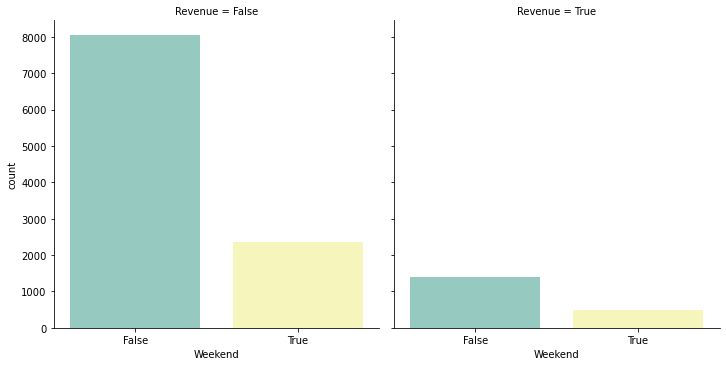

In [7]:
sn.catplot(x="Weekend", col="Revenue", data=df, kind="count", palette="Set3")
plt.show()

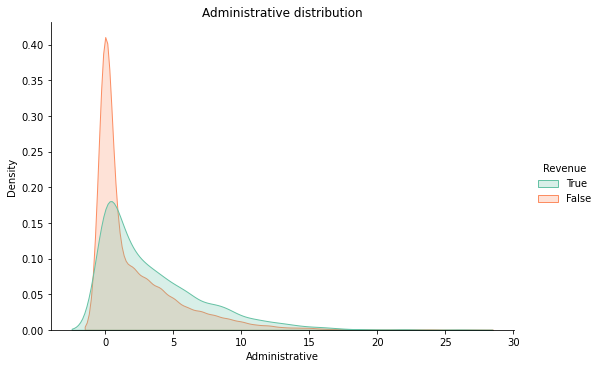

In [9]:
sn.displot(df, x="Administrative", hue="Revenue", kind="kde", fill=True, 
           hue_order=[True, False], aspect=1.5, common_norm=False, palette="Set2")

plt.title("Administrative distribution")
plt.show()

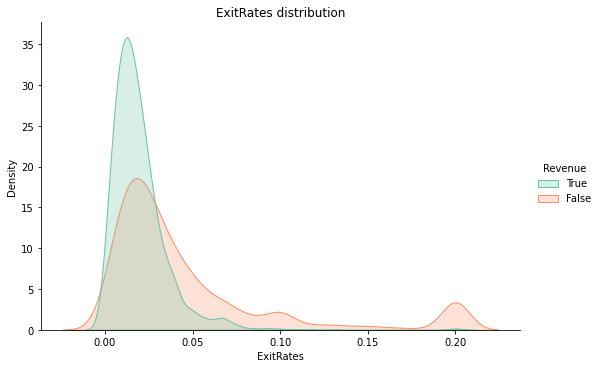

In [10]:
sn.displot(df, x="ExitRates", hue="Revenue", kind="kde", fill=True, 
           hue_order=[True, False], aspect=1.5, common_norm=False, palette="Set2")

plt.title("ExitRates distribution")
plt.show()

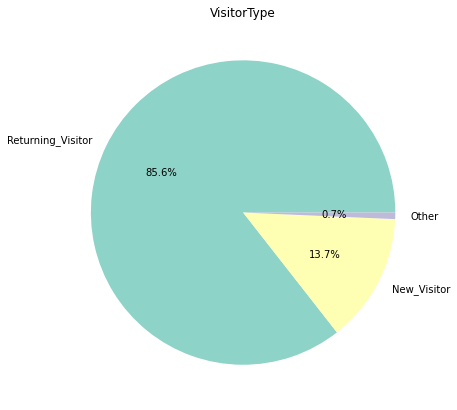

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(df["VisitorType"].value_counts(), labels=df["VisitorType"].unique(), autopct='%1.1f%%', colors=cm.get_cmap("Set3").colors)
plt.title("VisitorType")
plt.show()

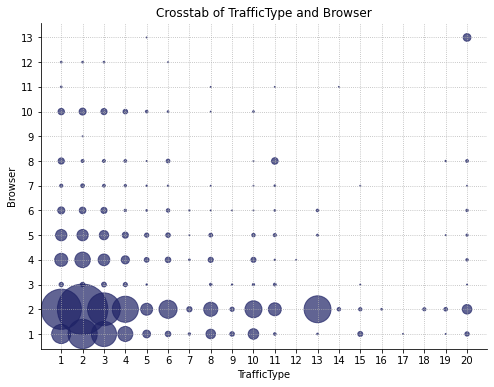

In [12]:
crosstab = pd.crosstab(df.TrafficType, df.Browser).stack().reset_index(name='C')

crosstab.plot.scatter('TrafficType', 'Browser', s=crosstab.C, alpha=0.7, figsize=(8, 6), c="#1e2266")

sn.despine()
plt.xticks(crosstab["TrafficType"].unique())
plt.yticks(crosstab["Browser"].unique())
plt.grid(linestyle="dotted")
plt.title("Crosstab of TrafficType and Browser")
plt.show()

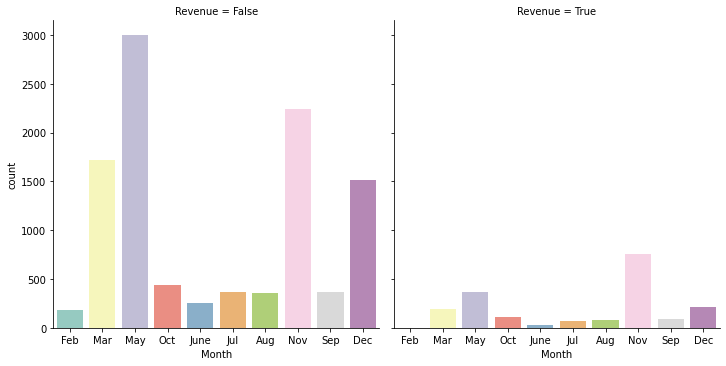

In [ ]:
sn.catplot(x="Month", col="Revenue", data=df, kind="count", palette="Set3")
plt.show()

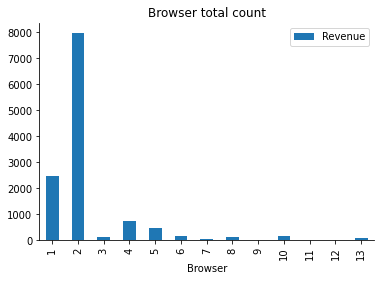

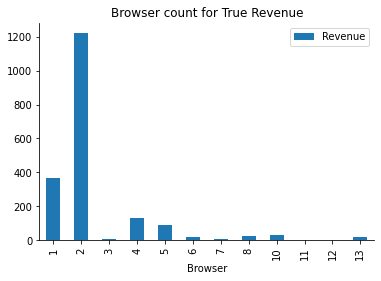

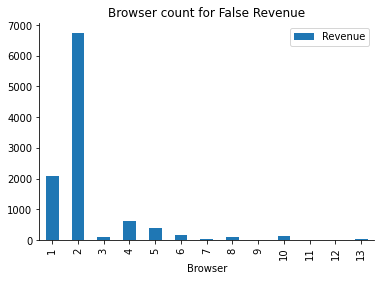

In [ ]:
df.groupby("Browser").count().plot(kind="bar", y="Revenue")
plt.title("Browser total count")
sn.despine()
plt.show()

df[df["Revenue"] == True].groupby("Browser").count().plot(kind="bar", y="Revenue")
plt.title("Browser count for True Revenue")
sn.despine()
plt.show()

df[df["Revenue"] == False].groupby("Browser").count().plot(kind="bar", y="Revenue")
plt.title("Browser count for False Revenue")
sn.despine()
plt.show()

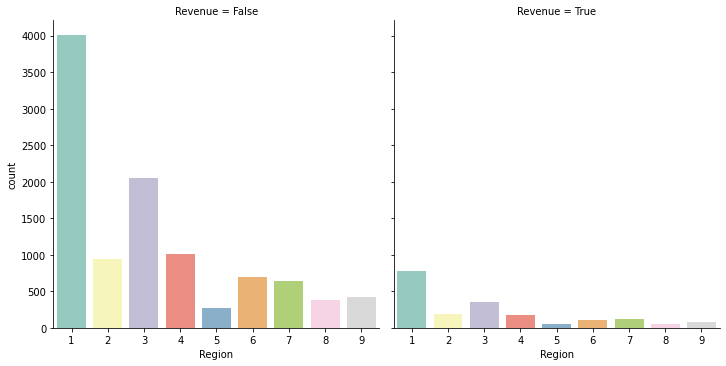

In [ ]:
sn.catplot(x="Region", col="Revenue", data=df, kind="count", palette="Set3")

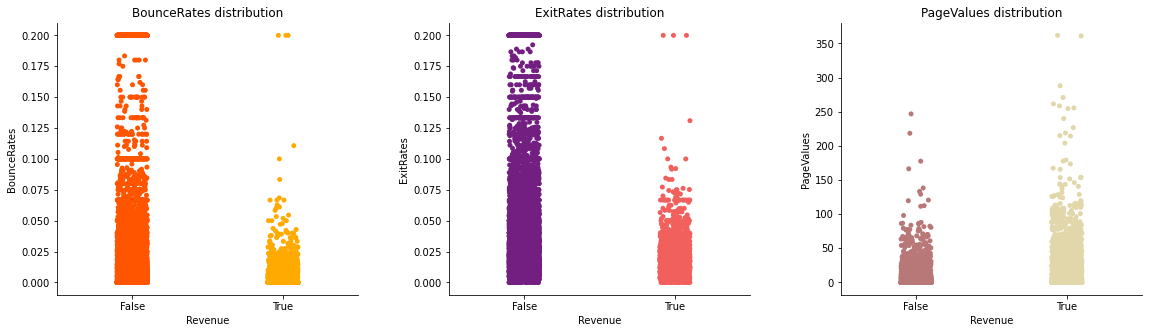

In [ ]:
plt.figure(figsize=(9, 5))
plt.subplots_adjust(right=1.8, wspace=0.3)
plt.subplot(1, 3, 1)
sn.stripplot(data=df, x='Revenue', y='BounceRates', palette='autumn')
plt.title('BounceRates distribution')
sn.despine()

plt.subplot(1, 3, 2)
sn.stripplot(data=df, x='Revenue', y='ExitRates', palette='magma')
plt.title('ExitRates distribution')
sn.despine()

plt.subplot(1, 3, 3)
sn.stripplot(data=df, x='Revenue', y='PageValues', palette='pink')
plt.title('PageValues distribution')
sn.despine()

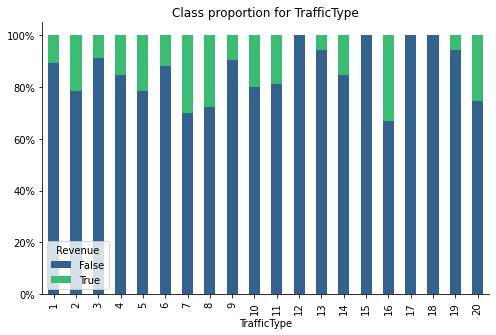

In [ ]:
def plot_revenue_proportion(column):

  ct = pd.crosstab(df[column], df['Revenue'])
  ax = ct.div(ct.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(8, 5), color=["#33638DFF", "#3CBB75FF"])
  plt.title('Class proportion for ' + str(column))
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
  sn.despine()
  plt.show()

plot_revenue_proportion("TrafficType")

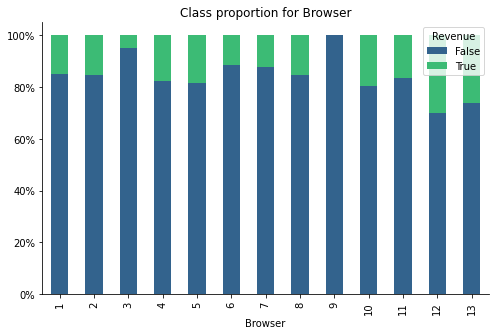

In [ ]:
plot_revenue_proportion("Browser")

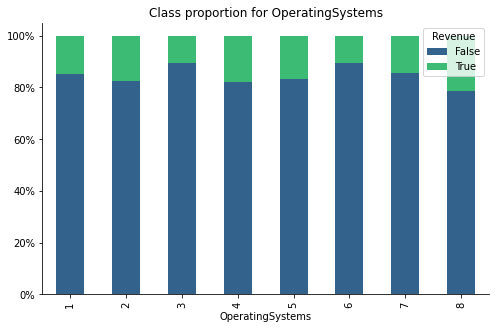

In [ ]:
plot_revenue_proportion("OperatingSystems")

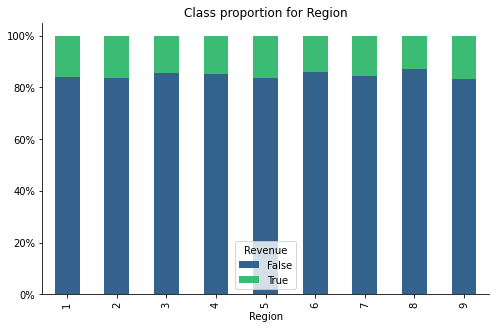

In [ ]:
plot_revenue_proportion("Region")

# 4. Classification

## 4.1. Data processing

Now that we have done some visualizations, we can process our DataFrame to format the data in order to apply classification algorithms on it.

We must make a copy of the original DataFrame.

In [13]:
df2 = df.copy()
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


We have categorical variables but some of them don't have the right type (int for Browser).

In [14]:
df2.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

We transform the boolean type columns into logical variables (0 or 1).

In [15]:
df2["Weekend"] = df2["Weekend"]. astype(int)
df2["Revenue"] = df2["Revenue"]. astype(int)


Now we change the type of every categorical variable which are not object type yet. Those are "OperatingSystems", "Browser", "Region" and "TrafficType".

"Month" and "VisitorType" are already of object type.

In [16]:
cat_col = ["OperatingSystems", "Browser", "Region", "TrafficType"]

for name in cat_col:
  df2[name] = df2[name].astype(object)

We can now Dummify our DataFrame. 

Dummify a variable consists of One Hot Encoding it. It transforms a categorical variable into an understandable feature for a model. 

If we have a variable named "color" with 3 possible values "green", "blue" and "red", we can't feed a model with this.
One Hot Encoding will transform this variable into 3 variables named "green", "blue", and "red" with 0 or 1 corresponding to the observation color. For example, a "blue" observation will have 1 in the "blue" column and 0 in the "green" and "red" ones. 

pandas.get_dummies() function apply this dummification on each column of type object. That's why we had to change the type of the categorical variables.

In [17]:
df2 = pd.get_dummies(df2)

In [18]:
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


Now that we have dummified our DataFrame, we can create our train set and our test set. The stratify parameter means we want an equal distribution of each class in our train set and our test set.

In [19]:
from sklearn.model_selection import train_test_split

x = df2.drop("Revenue", axis=1).values
y = df2["Revenue"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
print(x.shape, y.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12330, 74) (12330,)
(9864, 74) (2466, 74) (9864,) (2466,)


In [21]:
print(np.unique(y, return_counts=True))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([10422,  1908], dtype=int64))
(array([0, 1]), array([8338, 1526], dtype=int64))
(array([0, 1]), array([2084,  382], dtype=int64))


## 4.2. Classification models

Now that we have our train set and our test set, we can use different models for the classification.
We'll use 3 models:

*   A Decision Tree
*   A Multi-layer Perceptron
*   A Random Forest Classifier

First, we define a fonction named plot_conf_matrix which will be used to plot the confusion_matrix and the accuracy_score on the test set for a given model.


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_conf_matrix(model, x, y):

  predict = model.predict(x)
  round_predict = np.round(predict)

  matrix = confusion_matrix(y, round_predict)
  sn.heatmap(matrix, annot=True, cmap="Reds", fmt="d")
  plt.ylabel('True')
  plt.xlabel('Predicted')
  plt.title("Confusion Matrix")
  plt.show()
  print("Accuracy:", accuracy_score(y, round_predict))


We also define 2 lists to compare our models accuracy.

In [23]:
models_names = []
models_score = []

### 4.2.1. Classification tree

For our base model, we'll use a Decision Tree as a classifier. Trees are simple models but they are really good for our problem. Indeed, we have categorical values: while One Hot Encoding our variables, we'll have a lot of columns with 0 or 1. The Tree is good for these problems because it is well suited for discrete variables: it is easy to make separation between discrete steps.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=0)

tree.fit(x_train, y_train)

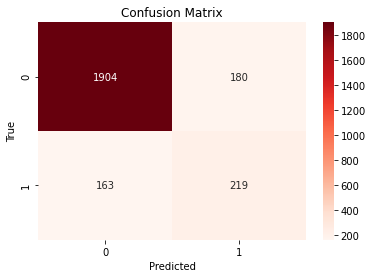

Accuracy: 0.8609083536090836


In [ ]:
plot_conf_matrix(tree, x_test, y_test)

The result is already quite good, let's print our Tree.

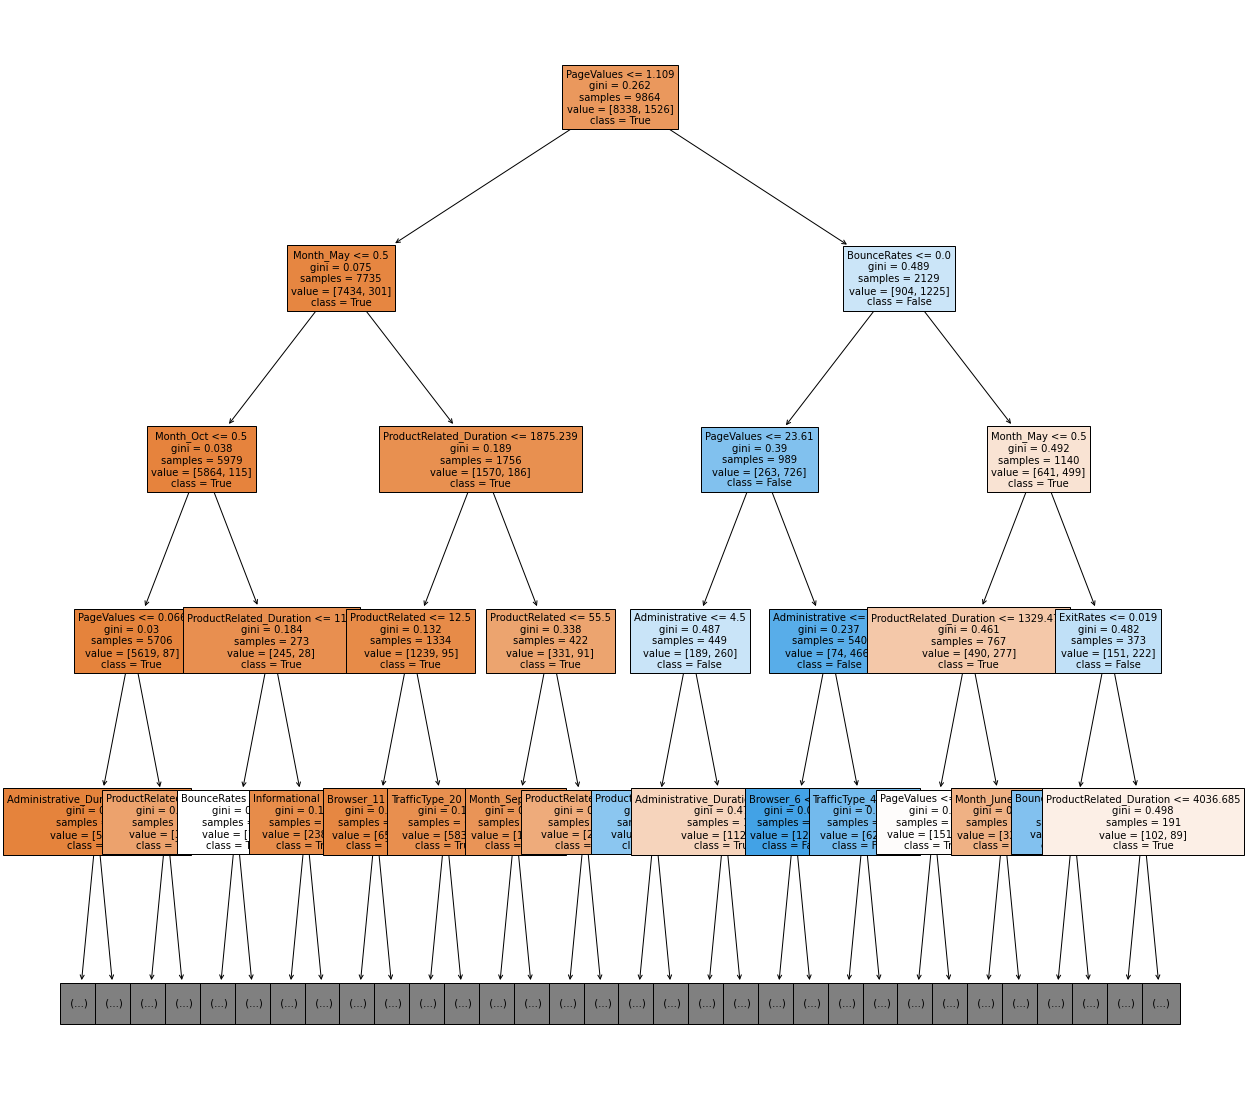

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=df2.columns, filled=True, max_depth=4, fontsize=10, class_names=["True", "False"])
plt.show()

In [ ]:
pip install dtreeviz

     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 204.2MB 70kB/s 
     |████████████████████████████████| 204kB 41.4MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=86fc93a6f467dc71f867af31ef8ee8b086a59a14438967e54347acc5eb3c71fa
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=5cf11099f5c76f85c4137cac1dac730624c2fb4bf37ce1fc5d11a884c544818b
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [ ]:
from dtreeviz.trees import dtreeviz

dtreeviz(tree, x_test, y_test, class_names="rr", )

In [ ]:
models_names.append("Tree")
models_score.append(tree.score(x_test, y_test))

Those results showed that the Tree is indeed well suited for our dataset even without hyperparameter configuration. Let's see with other models.

### 4.2.2. Multi-layer Perceptron

In this part, we'll use Deep Learning for our classification. Neural networks allow us to make robust models and give often good results for every machine learning problems. The disadvantage is that they are difficult to interpret and are called "black box". Also, they are more suited for numeric variables since they can model non-linear relationships.  

We'll define a simple Multi-layer Perceptron with 2 hidden layers of 32 neurons each.

Since it's a binary classification, we'll have a sigmoid in output and we'll compile our model with the binary_crossentropy loss. We use adam as optimizer and we use 10% of our data set as validation set to prevent over-fitting.

In [ ]:
from keras.layers import Dense, Flatten, experimental
from keras.models import Sequential

mlp1 = Sequential([
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation='sigmoid')])

mlp1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
history = mlp1.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
278/278 [==============================] - 1s 2ms/step - loss: 10.3837 - accuracy: 0.7656 - val_loss: 0.8027 - val_accuracy: 0.8713
Epoch 2/50
278/278 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.8633 - val_loss: 1.4922 - val_accuracy: 0.8652
Epoch 3/50
278/278 [==============================] - 0s 1ms/step - loss: 0.9825 - accuracy: 0.8585 - val_loss: 0.7481 - val_accuracy: 0.8156
Epoch 4/50
278/278 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.8585 - val_loss: 0.4070 - val_accuracy: 0.8886
Epoch 5/50
278/278 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.8704 - val_loss: 1.1738 - val_accuracy: 0.8663
Epoch 6/50
278/278 [==============================] - 0s 1ms/step - loss: 0.7884 - accuracy: 0.8602 - val_loss: 1.6260 - val_accuracy: 0.6819
Epoch 7/50
278/278 [==============================] - 0s 1ms/step - loss: 0.7213 - accuracy: 0.8591 - val_loss: 0.8402 - val_accuracy: 0.8734
Epoch

The result seems good, let's print the loss and the accuracy over epochs.

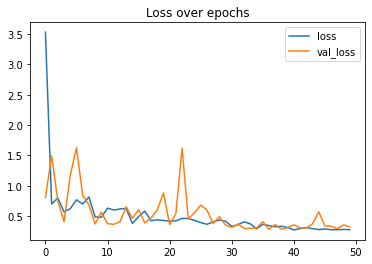

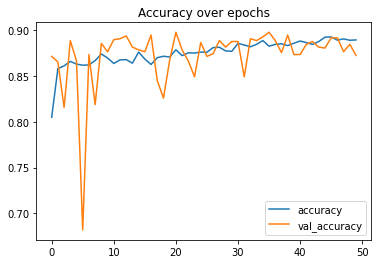

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

As we can see, the loss and the accuracy aren't stable over time, it's maybe because of the optimizer, we'll change adam and use the rmsprop. We'll also increase the number of neurons from 32 to 64.

In [ ]:
mlp2 = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation='sigmoid')])

mlp2.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
history = mlp2.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
278/278 [==============================] - 1s 2ms/step - loss: 4.5464 - accuracy: 0.7349 - val_loss: 0.6350 - val_accuracy: 0.8835
Epoch 2/50
278/278 [==============================] - 0s 1ms/step - loss: 2.7207 - accuracy: 0.8096 - val_loss: 2.6840 - val_accuracy: 0.8683
Epoch 3/50
278/278 [==============================] - 0s 1ms/step - loss: 2.1945 - accuracy: 0.8284 - val_loss: 1.9719 - val_accuracy: 0.6707
Epoch 4/50
278/278 [==============================] - 0s 2ms/step - loss: 1.6700 - accuracy: 0.8411 - val_loss: 1.1619 - val_accuracy: 0.8723
Epoch 5/50
278/278 [==============================] - 0s 1ms/step - loss: 1.3721 - accuracy: 0.8394 - val_loss: 0.9510 - val_accuracy: 0.8815
Epoch 6/50
278/278 [==============================] - 0s 1ms/step - loss: 1.2515 - accuracy: 0.8403 - val_loss: 0.6141 - val_accuracy: 0.8257
Epoch 7/50
278/278 [==============================] - 0s 1ms/step - loss: 0.7799 - accuracy: 0.8522 - val_loss: 0.8158 - val_accuracy: 0.8095
Epoch 

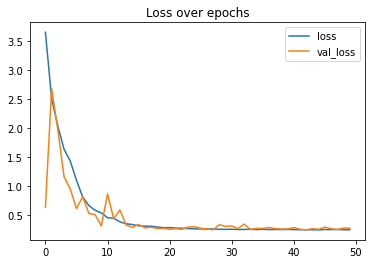

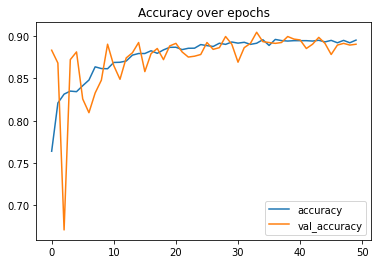

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

The results look better, even if the Accuracy doesn't increase, the model looks more stable. We see that we can use only 35 epochs instead of 50 since the loss and the accuracy are stable after 25/30.

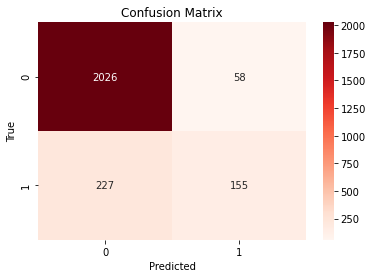

0.8844282238442822


In [ ]:
plot_conf_matrix(mlp2, x_test, y_test)

As we can here, we have around 0.88 of accuracy score on the test set. It's good but when looking at the confusion matrix on the test set, we see that the multi-layer Perceptron tends to predict the "class 0" to every observations. It does this because it will reduce the error since there is more "class 0" observations compared to the "class 1".

To counter this, we'll assign weight to each class when fitting. With the parameter "class_weight", we'll tell the network that "class 0" will have a weight of 1 and "class 1" will have a weight of 2. With this, we'll penalize the network when it makes errors on "class 1".

We can now define our final version of our Perceptron, we'll now train on the entire train_set without validation set, we'll use the "class_weight" parameter and we'll reduce the nomber of epochs from 50 to 35.

In [ ]:
mlp3 = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation='sigmoid')])

mlp3.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
history = mlp3.fit(x_train, y_train, epochs=35, class_weight = {0: 1, 1: 2})

Epoch 1/35
309/309 [==============================] - 1s 1ms/step - loss: 10.7066 - accuracy: 0.6370
Epoch 2/35
309/309 [==============================] - 0s 1ms/step - loss: 5.9566 - accuracy: 0.7551
Epoch 3/35
309/309 [==============================] - 0s 1ms/step - loss: 4.8914 - accuracy: 0.7652
Epoch 4/35
309/309 [==============================] - 0s 1ms/step - loss: 3.1526 - accuracy: 0.8170
Epoch 5/35
309/309 [==============================] - 0s 1ms/step - loss: 2.2330 - accuracy: 0.8105
Epoch 6/35
309/309 [==============================] - 0s 1ms/step - loss: 1.9408 - accuracy: 0.8090
Epoch 7/35
309/309 [==============================] - 0s 1ms/step - loss: 1.5019 - accuracy: 0.8343
Epoch 8/35
309/309 [==============================] - 0s 1ms/step - loss: 1.0021 - accuracy: 0.8387
Epoch 9/35
309/309 [==============================] - 0s 1ms/step - loss: 0.8338 - accuracy: 0.8477
Epoch 10/35
309/309 [==============================] - 0s 1ms/step - loss: 0.7582 - accuracy: 0.849

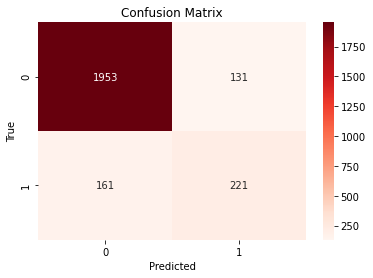

0.8815896188158961


In [ ]:
plot_conf_matrix(mlp3, x_test, y_test)

The accuracy has slightly decreased but the result is way better: when assigning class weights, we reduced the bias induced in the network so we have more "class 1" observation predicted which is more estimable compared to before.

In [ ]:
models_names.extend(["Base MLP", "Advanced MLP", "Advanced + weighted class MLP"])
models_score.extend([mlp1.evaluate(x_test, y_test)[1], mlp2.evaluate(x_test, y_test)[1], mlp3.evaluate(x_test, y_test)[1]])

78/78 [==============================] - 0s 893us/step - loss: 0.2846 - accuracy: 0.8816


### 4.2.3. Random Forest Classifier

The Multi-layer Perceptron gave really good results but it's not very interpretable and, since we have a lot of categorical variables, a Tree based model will be better for our problem.

For our final model, we'll use a Random Forest Classifier. This model is derived from Decision Trees and it uses several to create a "forest". Random Forests are easy to interpret and show better results than the classic single Tree.


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=1, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

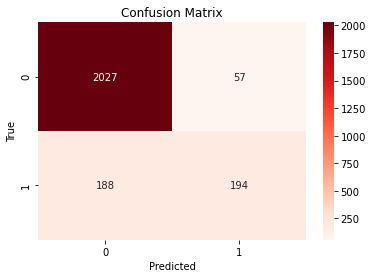

Accuracy: 0.9006488240064883


In [25]:
plot_conf_matrix(rfc, x_test, y_test)

The results are really good, we'll now apply a GridSearch to our Random Forest to determine the optimal parameters for our model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": np.arange(100, 600, 100),
    "min_samples_leaf": [1, 2, 3],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid.best_score_

0.9052105554807343

In [ ]:
grid.best_params_

{'min_samples_leaf': 1, 'n_estimators': 200}

We can now initialize our Random Forest with the best parameters determined using the GridSearch.

In [ ]:
rfcGS = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=1, random_state=42)
rfcGS.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

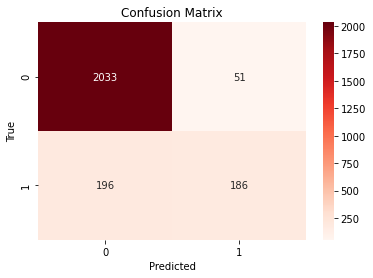

0.8998377939983779


In [ ]:
plot_conf_matrix(rfcGS, x_test, y_test)

In [ ]:
rfc.feature_importances_

array([3.77270531e-02, 4.68233212e-02, 1.20986148e-02, 1.74802705e-02,
       6.26513123e-02, 7.80878324e-02, 5.37844481e-02, 8.74367324e-02,
       4.12197456e-01, 6.20218549e-03, 7.07456177e-03, 2.10581873e-03,
       5.43159391e-03, 5.57551398e-04, 1.78139966e-03, 8.79217324e-04,
       9.18916553e-03, 1.28272710e-02, 2.77381246e-02, 3.51792028e-03,
       3.75831958e-03, 3.93820794e-03, 6.42194808e-03, 5.44270899e-03,
       9.07229597e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.26372998e-04, 3.55018710e-03, 5.49814252e-03, 1.60461431e-04,
       2.03701697e-03, 1.32694711e-03, 2.19794750e-04, 5.49498524e-06,
       1.72268733e-04, 0.00000000e+00, 5.86239525e-04, 0.00000000e+00,
       0.00000000e+00, 1.58605546e-04, 7.11036135e-03, 2.52318590e-03,
       4.99262128e-03, 2.69644294e-03, 9.26333321e-04, 1.47967880e-03,
       1.75281357e-03, 8.01443333e-04, 1.45496756e-03, 5.51392285e-03,
       1.15309004e-02, 5.45750325e-03, 2.86858256e-03, 1.44198601e-03,
      

Let's print the most important features for our classifier.

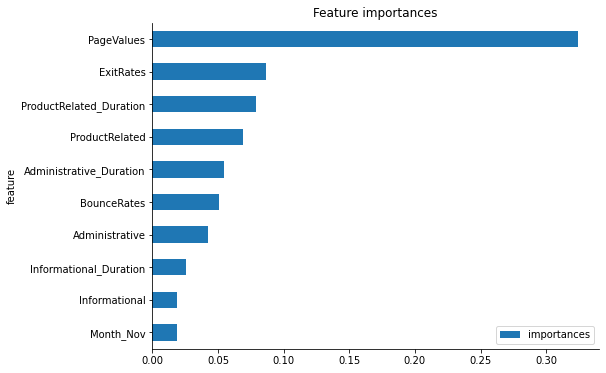

In [ ]:
feature_imp = pd.DataFrame({'feature': df2.drop("Revenue", axis=1).columns, 'importances': rfc.feature_importances_})

feature_imp.sort_values('importances', inplace=True)
feature_imp.tail(10).plot(kind='barh', y='importances', x='feature', figsize=(8, 6), title="Feature importances")
sn.despine()
plt.show()

In [ ]:
models_names.extend(["RFC", "RFC + GridSearch"])
models_score.extend([rfc.score(x_test, y_test), rfcGS.score(x_test, y_test)])

## 4.3 Models score

We can print the accuracy for each model to compare them.

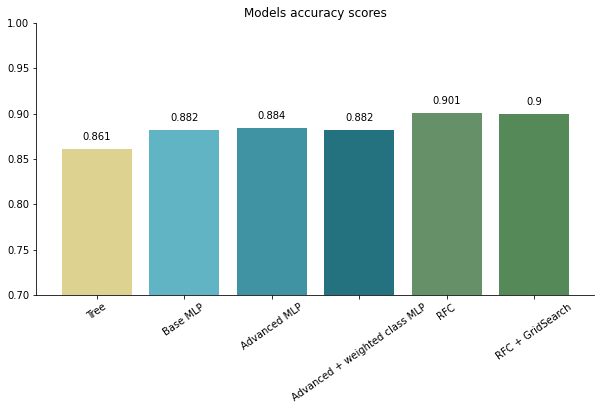

In [ ]:
colors = ["#ded290", "#60b4c4", "#4093a3", "#247180", "#669168", "#558a58"]

plt.figure(figsize=(10,5))
plt.bar(models_names, models_score, color=colors)
plt.xticks(rotation=35)
plt.ylim((0.7, 1))
sn.despine()

for i, score in enumerate(models_score):
  plt.text(i, score+0.01, np.round(score, 3), horizontalalignment='center')

plt.title("Models accuracy scores")
plt.show()

# 5. Saving objects for Django app

Now, we have to export our objects to use them in our Django App.

As we used the pandas.get_dummies() to One Hot Encode our categorical variables, we won't be able to reuse this function on a single observation: it needs the whole dataset to work. 

To get rid of this problem, we'll fit a One Hot Encoder from sklearn so we'll be able to save this encoder and to export it. This encoder will remember our DataFrame structure with all unique values for each categorical variables and we'll be able to dummify a single observations according to the saved structure.

We'll also save our last model, the Random Forest Classifier.

In [26]:
from sklearn.preprocessing import OneHotEncoder

col_c = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType"]
col = [col for col in df.columns.to_numpy() if col not in col_c]

enc = OneHotEncoder()
enc.fit(df[col_c])

df_not_cat = df[col].drop("Revenue", axis=1)

cat_values = enc.transform(df[col_c]).toarray()

x = np.concatenate((df_not_cat.values, cat_values), axis=1).astype('float32')
y = df["Revenue"].values.astype(int)


In [27]:
df.loc[4].to_json() # To populate the Django database

'{"Administrative":0,"Administrative_Duration":0.0,"Informational":0,"Informational_Duration":0.0,"ProductRelated":10,"ProductRelated_Duration":627.5,"BounceRates":0.02,"ExitRates":0.05,"PageValues":0.0,"SpecialDay":0.0,"Month":"Feb","OperatingSystems":3,"Browser":3,"Region":1,"TrafficType":4,"VisitorType":"Returning_Visitor","Weekend":true,"Revenue":false}'

In [29]:
import joblib

joblib.dump(enc, "./objects/enc")
joblib.dump(rfc, "./objects/rfc")

['./objects/rfc']